In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import pickle



In [2]:
df = pd.read_csv("final.csv")

In [3]:
df.head()

,activity_type,duration,guide_availability,location,season,day_of_the_week,group_type,number_of_person,terrain_type,risk_level,price
0,Rock Climbing,10,yes,Knuckles,Peak Season,Weekend,solo,1,Mountain,Medium,199
1,Hot Air Balloon,5,yes,Sigiriya,Peak Season,Weekend,solo,1,Mountain,Medium,272
2,Surfing,5,yes,Unawatuna,Peak Season,Weekend,solo,1,Beach,Low,90
3,Hiking,8,yes,Adam's Peak,Peak Season,Weekday,solo,1,Mountain,Low,117
4,Rock Climbing,10,yes,Ella,Off-Season,Weekend,group,5,Mountain,Medium,166


In [4]:
df.describe()

,duration,number_of_person,price
count,1525.000000,1525.000000,1525.000000
mean,5.392787,4.157377,115.988197
std,2.904621,3.894628,64.562061
min,1.000000,1.000000,21.000000
25%,2.000000,1.000000,70.000000
50%,5.000000,2.000000,101.000000
75%,8.000000,6.000000,145.000000
max,10.000000,12.000000,436.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   activity_type       1525 non-null   object
 1   duration            1525 non-null   int64 
 2   guide_availability  1525 non-null   object
 3   location            1525 non-null   object
 4   season              1525 non-null   object
 5   day_of_the_week     1525 non-null   object
 6   group_type          1525 non-null   object
 7   number_of_person    1525 non-null   int64 
 8   terrain_type        1525 non-null   object
 9   risk_level          1525 non-null   object
 10  price               1525 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 131.2+ KB


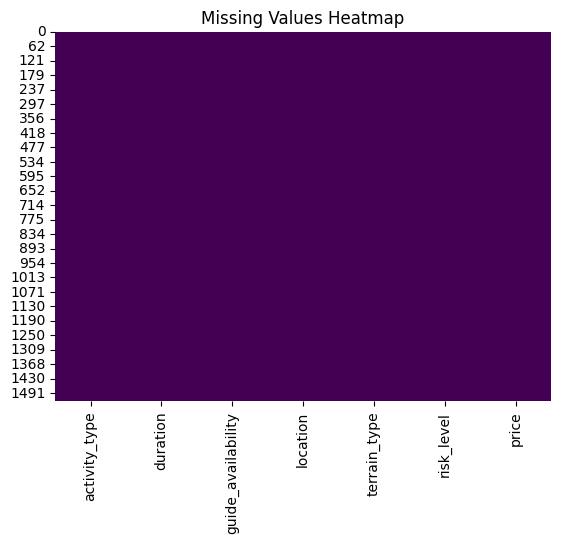

In [37]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
df.shape

(1525, 11)

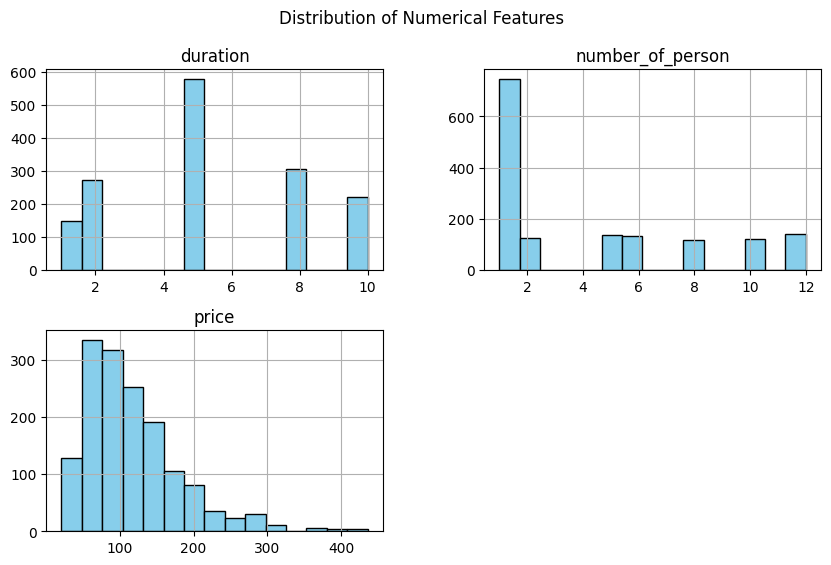

In [8]:
# Plot histograms for numerical features
df[['duration', 'number_of_person', 'price']].hist(bins=15, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.axis("off")
plt.show()




C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\2129645965.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


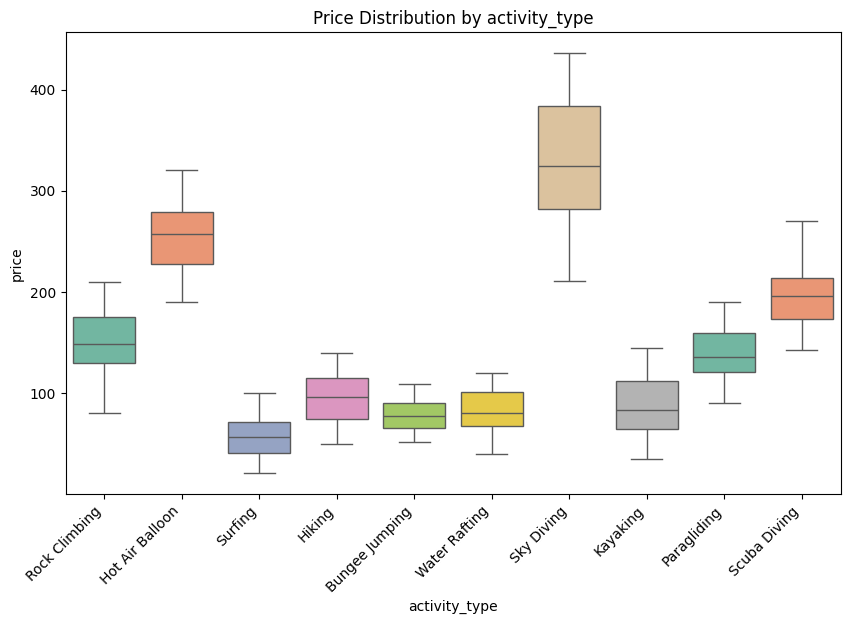

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\2129645965.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


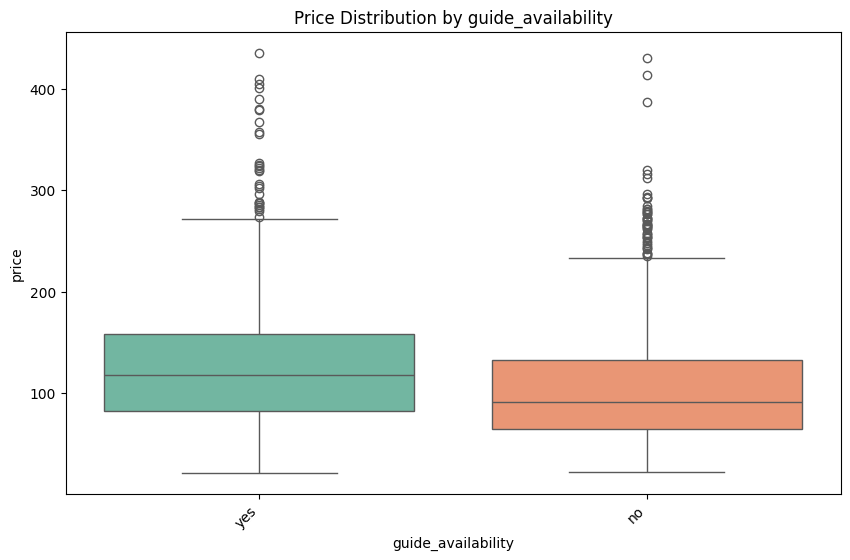

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\2129645965.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


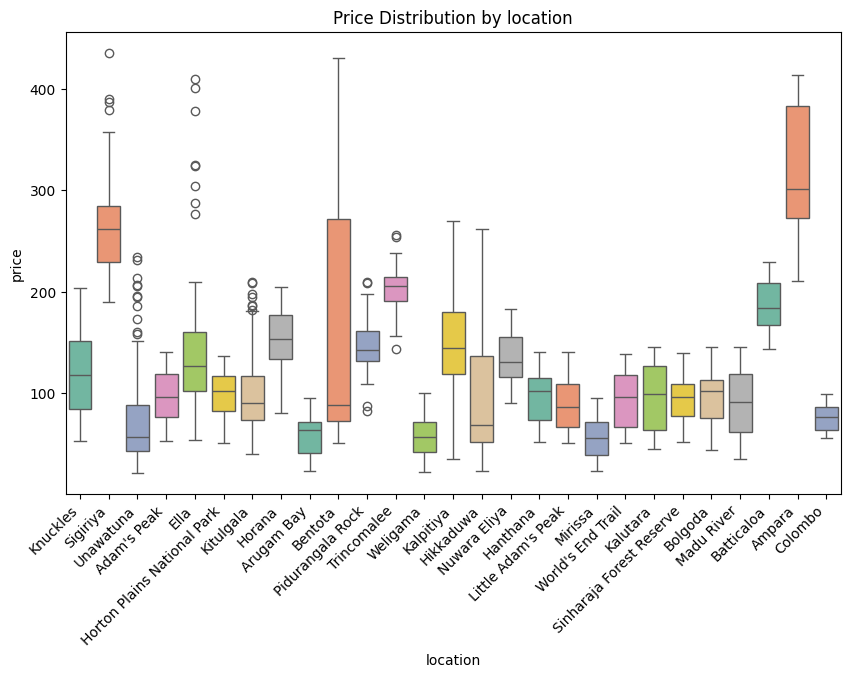

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\2129645965.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


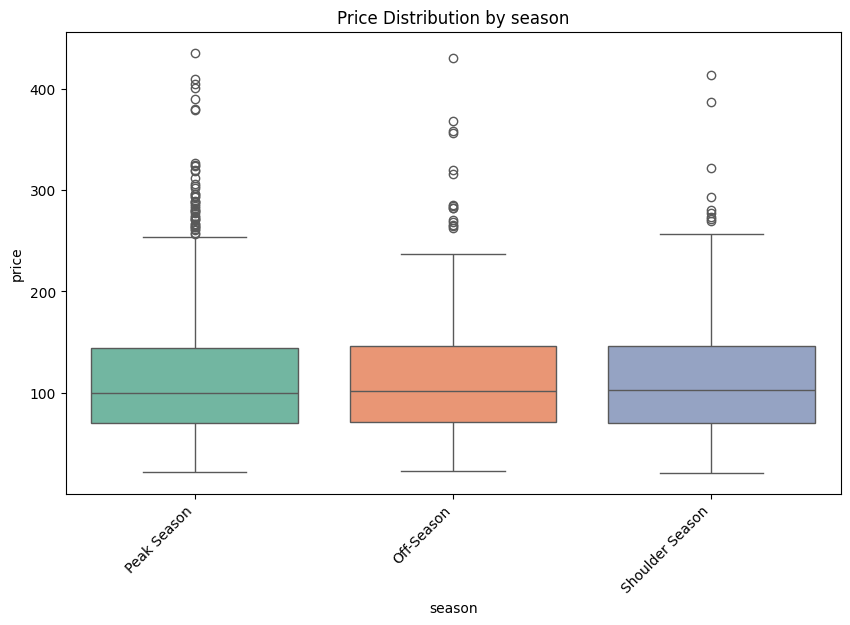

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\2129645965.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


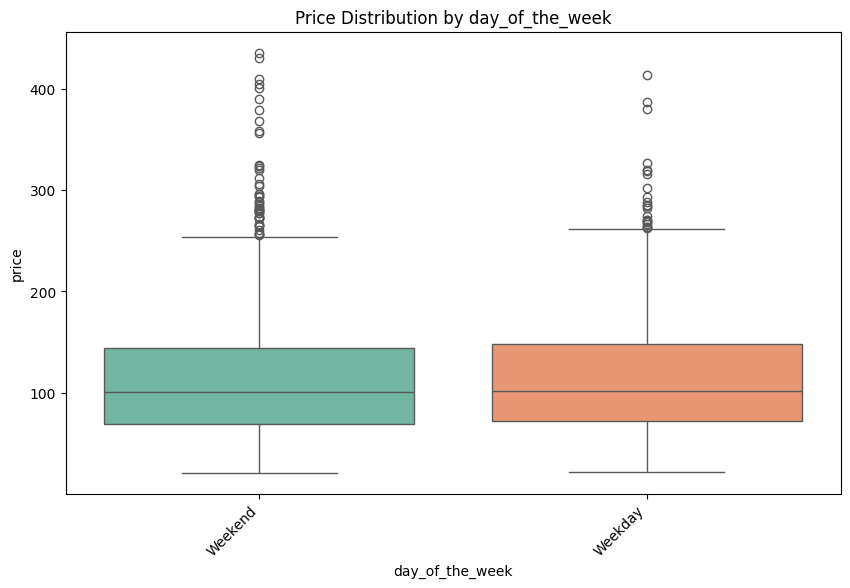

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\2129645965.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


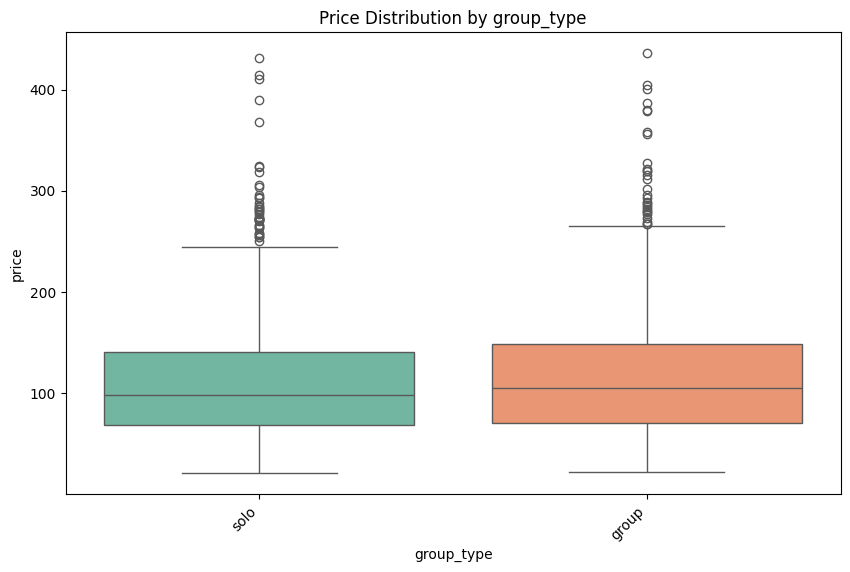

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\2129645965.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


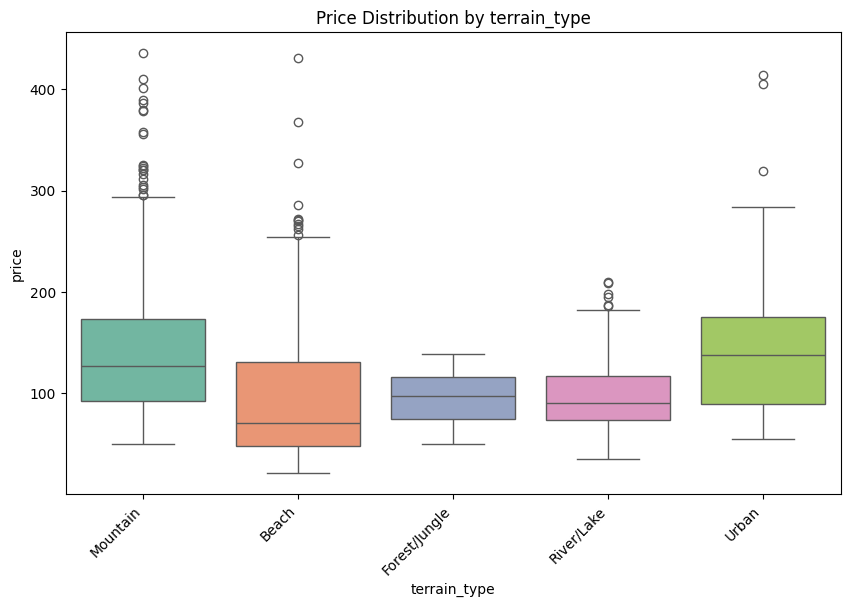

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\2129645965.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


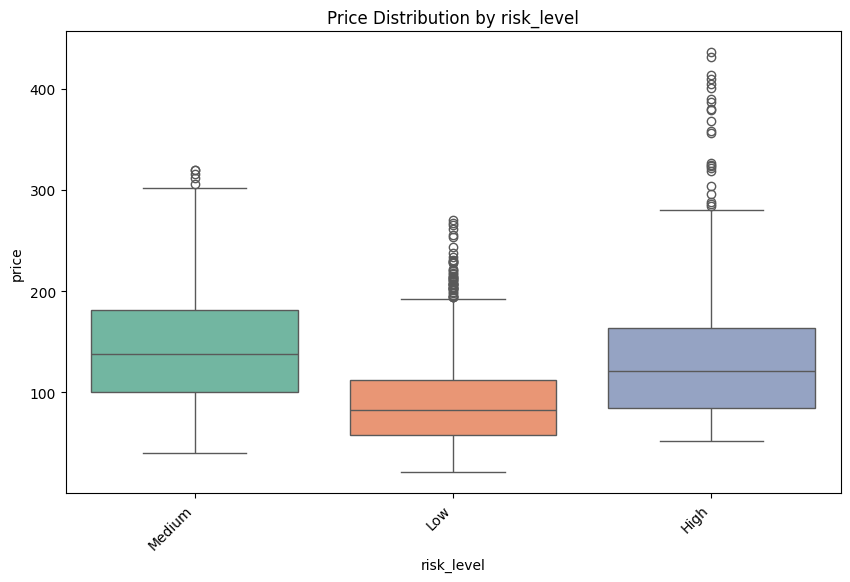

In [9]:
categorical_columns = ['activity_type', 'guide_availability', 'location', 'season', 
                       'day_of_the_week', 'group_type', 'terrain_type', 'risk_level']

import seaborn as sns
import matplotlib.pyplot as plt


for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], y=df['price'], palette='Set2')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Price Distribution by {col}")
    plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\4106630248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


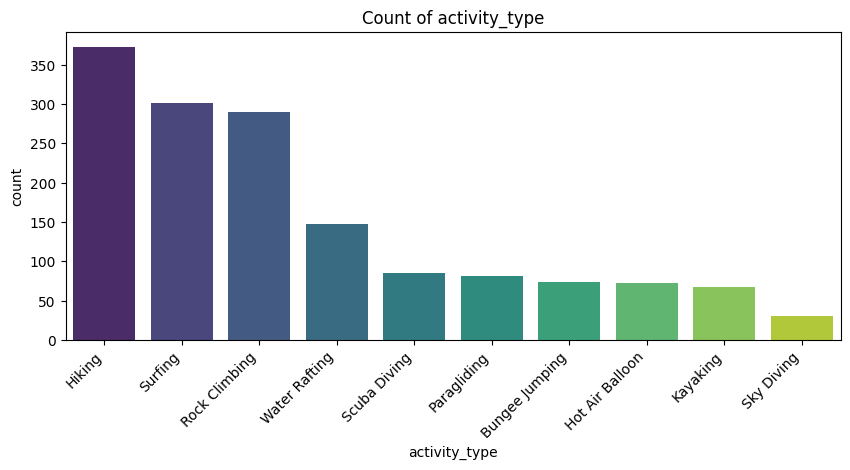

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\4106630248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


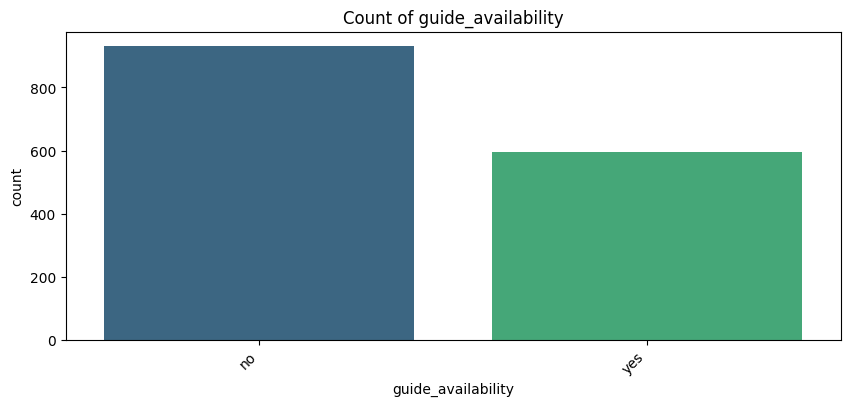

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\4106630248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


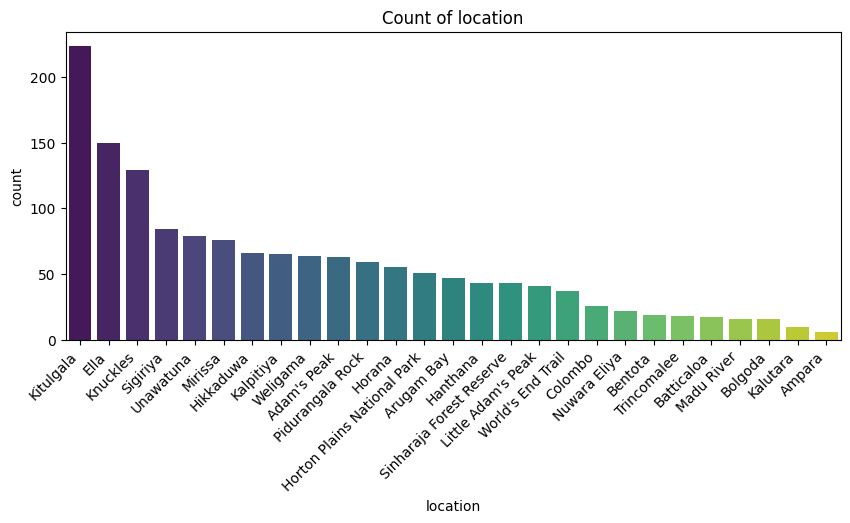

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\4106630248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


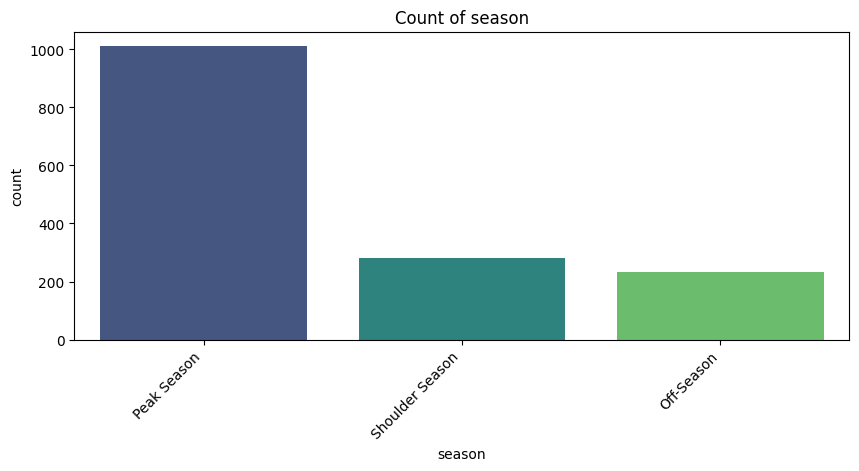

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\4106630248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


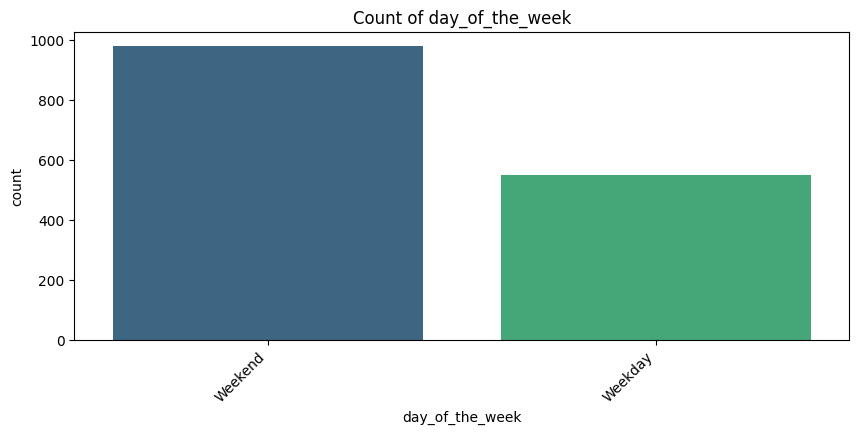

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\4106630248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


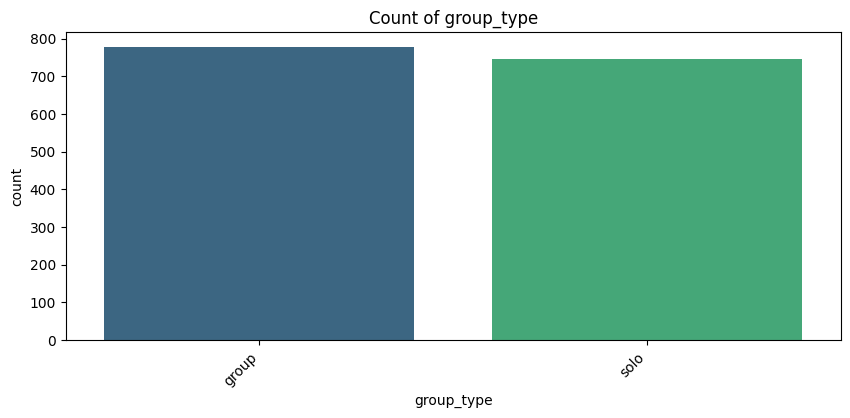

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\4106630248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


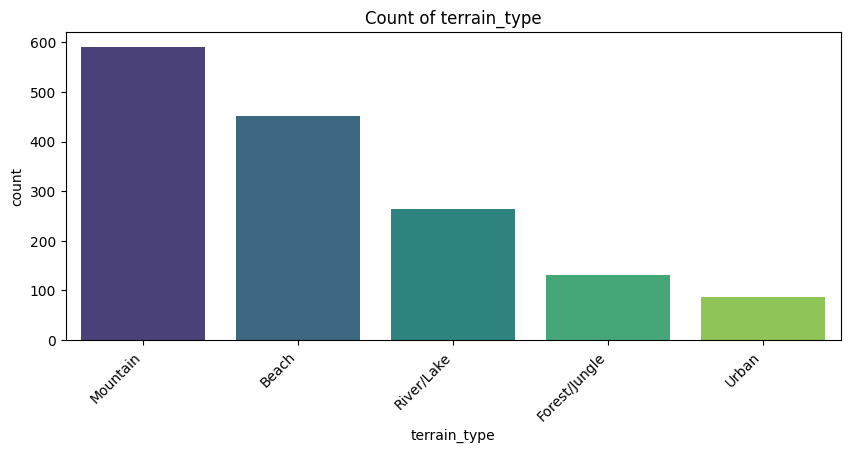

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\4106630248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


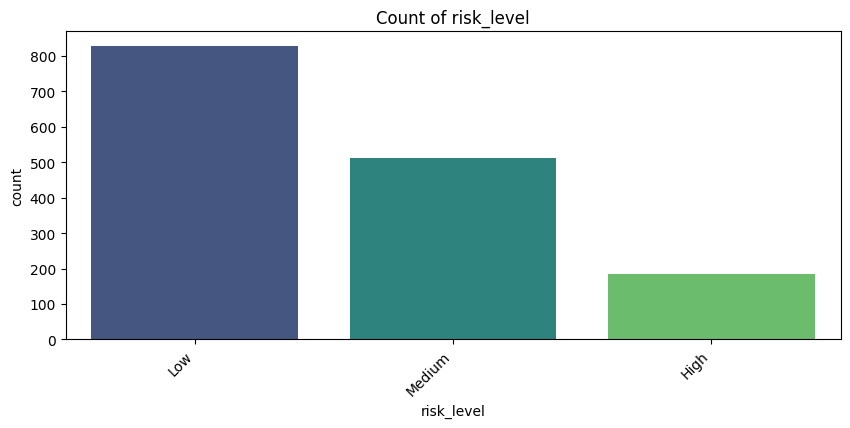

In [10]:

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Count of {col}")
    plt.show()


In [11]:
from scipy.stats import f_oneway

for col in categorical_columns:
    categories = df[col].unique()
    data = [df[df[col] == cat]['price'] for cat in categories]
    f_stat, p_val = f_oneway(*data)
    print(f"ANOVA for {col}: F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print(f"There's a significant difference in price across the categories of {col}.")
    else:
        print(f"No significant difference in price across the categories of {col}.")
    print()


ANOVA for activity_type: F-statistic = 786.36, p-value = 0.0000
There's a significant difference in price across the categories of activity_type.

ANOVA for guide_availability: F-statistic = 42.09, p-value = 0.0000
There's a significant difference in price across the categories of guide_availability.

ANOVA for location: F-statistic = 78.39, p-value = 0.0000
There's a significant difference in price across the categories of location.

ANOVA for season: F-statistic = 0.54, p-value = 0.5820
No significant difference in price across the categories of season.

ANOVA for day_of_the_week: F-statistic = 0.48, p-value = 0.4872
No significant difference in price across the categories of day_of_the_week.

ANOVA for group_type: F-statistic = 1.45, p-value = 0.2285
No significant difference in price across the categories of group_type.

ANOVA for terrain_type: F-statistic = 55.16, p-value = 0.0000
There's a significant difference in price across the categories of terrain_type.

ANOVA for risk_leve

In [12]:
df.drop(["season", 'day_of_the_week', 'group_type'], axis=1, inplace=True)

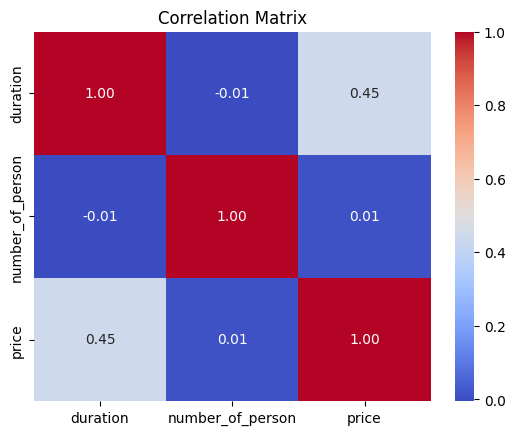

In [13]:
corr = df[['duration', 'number_of_person', 'price']].corr()



sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [14]:
df.drop("number_of_person", axis=1, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\1144912027.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


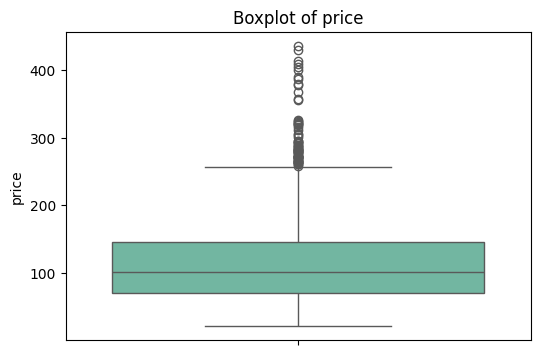

In [15]:
numerical_columns = [ 'price']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.show()


In [16]:
# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]



C:\Users\Asus\AppData\Local\Temp\ipykernel_178256\1144912027.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


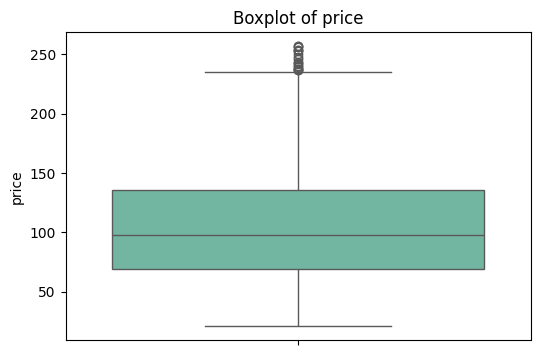

In [17]:
numerical_columns = [ 'price']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.show()


c:\Users\Asus\anaconda3\envs\ml_env\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Asus\anaconda3\envs\ml_env\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Asus\anaconda3\envs\ml_env\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Asus\anaconda3\envs\ml_env\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


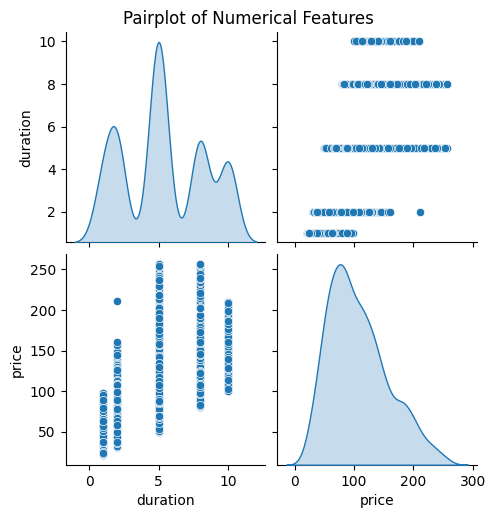

In [18]:
sns.pairplot(df[['duration', 'price']], diag_kind='kde', markers='o', palette='husl')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


In [19]:
X = df.drop(columns='price', axis=1)
y = df['price']

In [20]:
categorical_features = ['activity_type', 'guide_availability', 'location',  'terrain_type', 'risk_level']
numerical_features = ['duration']

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf', C=1.0, epsilon=0.1),
}


In [24]:
results = {}
best_model = None
best_rmse = float('inf')
best_r2 = -float('inf')

In [25]:
for name, model in models.items():
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    
    pipeline.fit(X_train, y_train)
    
    
    y_pred = pipeline.predict(X_test)
    
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    
    results[name] = {'RMSE': rmse, 'R²': r2}
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")
    
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = pipeline
    if r2 > best_r2:
        best_r2 = r2
        best_model = pipeline


print(f"\nBest Model: {best_model.steps[-1][0]} with RMSE = {best_rmse:.2f} and R² = {best_r2:.2f}")

Linear Regression: RMSE = 17.87, R² = 0.90
Ridge Regression: RMSE = 18.19, R² = 0.89
Lasso Regression: RMSE = 19.21, R² = 0.88
Random Forest: RMSE = 20.37, R² = 0.87
Decision Tree: RMSE = 21.11, R² = 0.86
Support Vector Regressor: RMSE = 42.61, R² = 0.41

Best Model: regressor with RMSE = 17.87 and R² = 0.90


In [26]:
if best_model:
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)

## do predictions

In [34]:
for_prediction = df[7:8].drop("price", axis=1)

In [38]:
for_prediction

,activity_type,duration,guide_availability,location,terrain_type,risk_level
7,Hiking,5,no,Adam's Peak,Mountain,Low


In [39]:
predicted_price = best_model.predict(for_prediction)
predicted_price[0]

np.float64(70.18853960029924)